# hapus outlier, transformasi + hapus undefined di meal, market_segment, distribusi_channel, hapus adult=0

## load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN-FINPRO/hotel_booking.csv')

In [ ]:
 ! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
! pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.5 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 26.7 MB 15.5 MB/s 
     |████████████████████████████████| 3.2 MB 48.4 MB/s 
     |████████████████████████████████| 255.9 MB 41 kB/s 
     |████████████████████████████████| 72 kB 856 kB/s 
     |████████████████████████████████| 1.6 MB 61.0 MB/s 
     |████████████████████████████████| 121 kB 50.2 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgb

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from featurewiz import featurewiz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import shap

In [ ]:
#drive tina
df_mod = pd.read_csv('/content/drive/MyDrive/RAKAMIN-FINPRO/hotel_booking_after_preprocessing5.csv')

In [ ]:
#drive ferry
df_mod = pd.read_csv('/content/drive/MyDrive/data science/final project/hotel_booking_after_preprocessing5.csv')

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97372 entries, 0 to 97371
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           97372 non-null  int64  
 1   is_canceled                     97372 non-null  int64  
 2   arrival_date_day_of_month       97372 non-null  int64  
 3   stays_in_weekend_nights         97372 non-null  int64  
 4   stays_in_week_nights            97372 non-null  int64  
 5   adults                          97372 non-null  int64  
 6   children                        97372 non-null  int64  
 7   babies                          97372 non-null  int64  
 8   is_repeated_guest               97372 non-null  int64  
 9   previous_cancellations          97372 non-null  int64  
 10  previous_bookings_not_canceled  97372 non-null  int64  
 11  booking_changes                 97372 non-null  int64  
 12  days_in_waiting_list            

### split data

In [ ]:
df_mod.columns

Index(['hotel', 'is_canceled', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'deposit_type_No Deposit',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'reserved_vs_assigned', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'origin_type'],
      dtype='object')

In [ ]:
X = df_mod[['hotel', 'is_canceled', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'deposit_type_No Deposit',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'reserved_vs_assigned', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'origin_type']].copy()

y = df_mod[['is_canceled']].copy()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(68160, 40)
(29212, 40)
(68160, 1)
(29212, 1)


### modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train-mean): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test-mean): '+ str(score['test_score'].mean()))
    print('roc_auc (crossval train-std): '+ str(score['train_score'].std()))
    print('roc_auc (crossval test-std): '+ str(score['test_score'].std()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(Xtrain, ytrain)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain)
        train_auc = roc_auc_score(ytrain, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xtest)
        test_auc = roc_auc_score(ytest, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [ ]:
df_mod.is_canceled.value_counts(normalize=True)

0    0.604599
1    0.395401
Name: is_canceled, dtype: float64

### fit model

#### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(Xtrain, ytrain) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.81
Recall (Test Set): 0.66
F1-Score (Test Set): 0.72
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval train-mean): 0.8874895151699642
roc_auc (crossval test-mean): 0.8306230089106645
roc_auc (crossval train-std): 0.004651917165342419
roc_auc (crossval test-std): 0.039894030121089864


#### k-Nearest Neighbor

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(Xtrain, ytrain) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.75
Recall (Test Set): 0.70
F1-Score (Test Set): 0.72
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.94
roc_auc (crossval train-mean): 0.9536151866374116
roc_auc (crossval test-mean): 0.5720299725140574
roc_auc (crossval train-std): 0.0029779017184499166
roc_auc (crossval test-std): 0.07772470672159548


#### decision tree

In [ ]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xtrain, ytrain) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.78
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00
roc_auc (crossval train-mean): 0.999943162197163
roc_auc (crossval test-mean): 0.6278257966984303
roc_auc (crossval train-std): 1.7580545696833147e-05
roc_auc (crossval test-std): 0.031305469527385825


#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)
eval_classification(rf)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.87
Recall (Test Set): 0.80
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
roc_auc (crossval train-mean): 0.9995669681254487
roc_auc (crossval test-mean): 0.743898516756777
roc_auc (crossval train-std): 0.00012265135740197308
roc_auc (crossval test-std): 0.0650574796659357


####GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
eval_classification(nb)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.80
Recall (Test Set): 0.53
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.82
roc_auc (crossval train-mean): 0.8260710766548666
roc_auc (crossval test-mean): 0.7697436602547778
roc_auc (crossval train-std): 0.00453177923484693
roc_auc (crossval test-std): 0.06197425368490566


#### XGB

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xtrain, ytrain)
eval_classification(xg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.85
Recall (Test Set): 0.78
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.95
roc_auc (crossval train-mean): 0.9584645304791671
roc_auc (crossval test-mean): 0.7800752960625432
roc_auc (crossval train-std): 0.0020556113058589447
roc_auc (crossval test-std): 0.06880795182152558


####catboost

In [ ]:
cb = CatBoostClassifier(verbose=False)
cb.fit(Xtrain, ytrain)
eval_classification(cb)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.78
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.95
roc_auc (crossval train-mean): 0.9588354125204447
roc_auc (crossval test-mean): 0.7855800582956155
roc_auc (crossval train-std): 0.0021584184118475696
roc_auc (crossval test-std): 0.07039087227135649


####AdaBoost

In [ ]:
ab = AdaBoostClassifier()
ab.fit(Xtrain, ytrain)
eval_classification(ab)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.81
Recall (Test Set): 0.68
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train-mean): 0.8978315150485601
roc_auc (crossval test-mean): 0.8365330653172915
roc_auc (crossval train-std): 0.003702620796424427
roc_auc (crossval test-std): 0.038209846224225415


## Model Evaluation: Pemilihan dan perhitungan metrics model

Metriks yang digunakan untuk project ini adalah **recall**. Pemilihan recall dengan tujuan untuk menekan angka false negatif (diprediksi tidak cancel ternyata iya). Dengan menekan angka false negatif sekecil mungkin, selain dapat menurunkan cancellation rate, maka tim bisnis juga dapat lebih fokus kepada customer yang diprediksi false positif (diprediksi cancel ternyata tidak) sehingga cost untuk mempertahankan customer agar tidak cancel menjadi berkurang.

In [ ]:
feats = featurewiz(df_mod, 'is_canceled', corr_limit=0.7, verbose=0)
len(feats)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (97372, 40)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#################################

2

In [ ]:
feats[0]

['deposit_type_No Deposit',
 'previous_cancellations',
 'market_segment_Online TA',
 'reserved_vs_assigned',
 'deposit_type_Refundable',
 'total_of_special_requests_norm',
 'origin_type',
 'customer_type_Transient',
 'booking_changes',
 'lead_time_norm',
 'meal_SC',
 'hotel',
 'market_segment_Groups']

In [ ]:
x_new = df_mod[['deposit_type_No Deposit',
 'previous_cancellations',
 'market_segment_Online TA',
 'reserved_vs_assigned',
 'deposit_type_Refundable',
 'total_of_special_requests_norm',
 'origin_type',
 'customer_type_Transient',
 'booking_changes',
 'lead_time_norm',
 'meal_SC',
 'hotel',
 'market_segment_Groups']].copy()

In [ ]:
 x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_new(model):
    y_pred = model.predict(x_new_test)
    y_pred_train = model.predict(x_new_train)
    y_pred_proba = model.predict_proba(x_new_test)
    y_pred_proba_train = model.predict_proba(x_new_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x_new, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train-mean): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test-mean): '+ str(score['test_score'].mean()))
    print('roc_auc (crossval train-std): '+ str(score['train_score'].std()))
    print('roc_auc (crossval test-std): '+ str(score['test_score'].std()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## fit model

In [ ]:
print(x_new_train.shape)
print(x_new_test.shape)
print(y_train.shape)
print(y_test.shape)

(68160, 13)
(29212, 13)
(68160, 1)
(29212, 1)


### logistic regression

In [ ]:
logreg = LogisticRegression(solver='liblinear') # inisiasi object dengan nama logreg
logreg.fit(x_new_train, y_train) # fit model regression dari data train
eval_classification_new(logreg)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.80
Recall (Test Set): 0.64
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval train-mean): 0.8786713178096581
roc_auc (crossval test-mean): 0.8682114440255052
roc_auc (crossval train-std): 0.004690239013820388
roc_auc (crossval test-std): 0.03302388179427927


### knn

In [ ]:
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_new_train, y_train) # fit model KNN dari data train
eval_classification_new(knn)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.80
Recall (Test Set): 0.75
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.93
roc_auc (crossval train-mean): 0.8973541588780076
roc_auc (crossval test-mean): 0.7893744446369052
roc_auc (crossval train-std): 0.01722105355406927
roc_auc (crossval test-std): 0.034275426137102945


### decision tree

In [ ]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(x_new_train, y_train) # fit model decision tree dari data train
eval_classification_new(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.81
Recall (Test Set): 0.74
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.96
roc_auc (crossval train-mean): 0.9633118630826463
roc_auc (crossval test-mean): 0.7630709266895834
roc_auc (crossval train-std): 0.001716547155485383
roc_auc (crossval test-std): 0.06023166118492649


### gaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(x_new_train, y_train)
eval_classification_new(nb)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.98
Recall (Test Set): 0.39
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.82
roc_auc (crossval train-mean): 0.8214157144742049
roc_auc (crossval test-mean): 0.8081446246922569
roc_auc (crossval train-std): 0.006642563162781161
roc_auc (crossval test-std): 0.052618544749570104


### random forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_new_train, y_train)
eval_classification_new(rf)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.76
F1-Score (Test Set): 0.78
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.96
roc_auc (crossval train-mean): 0.9607786379025594
roc_auc (crossval test-mean): 0.8211532227558582
roc_auc (crossval train-std): 0.0015486047632003975
roc_auc (crossval test-std): 0.038038843792909977


### xgb

In [ ]:
xg = XGBClassifier()
xg.fit(x_new_train, y_train)
eval_classification_new(xg)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.92
roc_auc (crossval train-mean): 0.9274912253428298
roc_auc (crossval test-mean): 0.8747239616453445
roc_auc (crossval train-std): 0.00157164658442718
roc_auc (crossval test-std): 0.033331117362001006


### catboost

In [ ]:
cb = CatBoostClassifier(verbose=False)
cb.fit(x_new_train, y_train)
eval_classification_new(cb)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.92
roc_auc (crossval train-mean): 0.9279100752341624
roc_auc (crossval test-mean): 0.87823668370076
roc_auc (crossval train-std): 0.0013544222067942329
roc_auc (crossval test-std): 0.030356450433499636


### adaboost

In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_new_train, y_train)
eval_classification_new(ab)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.81
Recall (Test Set): 0.68
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train-mean): 0.8898126569016103
roc_auc (crossval test-mean): 0.8778096683046629
roc_auc (crossval train-std): 0.003960051922099845
roc_auc (crossval test-std): 0.02738358496773455


## Hypertuning Parameter - XGBoost

In [ ]:
hyperparameters = {
                   'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                   'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                   'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                   'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                   'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                   'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],                  
                   'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]                    
                   }

xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, n_jobs=1)
xg_tuned.fit(x_new_train,y_train)

y_pred = xg_tuned.predict(x_new_train)
eval_classification_new(xg_tuned)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train-mean): 0.9184059503079768
roc_auc (crossval test-mean): 0.8793286848018453
roc_auc (crossval train-std): 0.004863140143790023
roc_auc (crossval test-std): 0.029289434736962397


In [ ]:
### hyperparameter yang digunakan 
print(xg_tuned.best_params_)

{'tree_method': 'approx', 'min_child_weight': 4, 'max_depth': 50, 'lambda': 0.6000000000000001, 'gamma': 1.0, 'eta': 0.31313131313131315, 'colsample_bytree': 0.7000000000000001, 'alpha': 0.6000000000000001}


In [ ]:
xg_new = XGBClassifier(tree_method = 'auto', min_child_weight =  4, max_depth = 50, reg_lambda = 0.6000000000000001, gamma = 1.0, eta = 0.31313131313131315, colsample_bytree = 0.7000000000000001, alpha = 0.6000000000000001)
xg_new.fit(x_new_train, y_train)
eval_classification_new(xg_new)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.76
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.94
roc_auc (crossval train-mean): 0.9436946612549164
roc_auc (crossval test-mean): 0.8648906890758573
roc_auc (crossval train-std): 0.0009941195067401244
roc_auc (crossval test-std): 0.0335370274392797


## Hypertuning Parameter - CatBoost

In [ ]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
              }

cb = CatBoostClassifier(verbose=False)
cb_tuned = RandomizedSearchCV(cb, parameters, cv = 5, scoring='recall', n_jobs=-1)
cb_tuned.fit(x_new_train, y_train)

y_pred = cb_tuned.predict(x_new_train)
eval_classification_new(cb_tuned)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.77
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train-mean): 0.901951987737427
roc_auc (crossval test-mean): 0.8803530079651894
roc_auc (crossval train-std): 0.009441819215519443
roc_auc (crossval test-std): 0.017287668869704145


In [ ]:
### hyperparameter yang digunakan 
print(cb_tuned.best_params_)

{'learning_rate': 0.01, 'iterations': 50, 'depth': 6}


In [ ]:
cb_new = CatBoostClassifier(verbose=False, depth = 6, iterations = 50, learning_rate = 0.01)
cb_new.fit(x_new_train, y_train)
eval_classification_new(cb_new)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.77
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train-mean): 0.8896852595616535
roc_auc (crossval test-mean): 0.8753065432520039
roc_auc (crossval train-std): 0.0016045681884605592
roc_auc (crossval test-std): 0.010637677265869004


###confusion matrix

In [ ]:
y_predicted = xg_new.predict(x_new_test)
y_predicted

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_predicted, labels=[1,0])

array([[ 8798,  2824],
       [ 1865, 15725]])

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     17590
           1       0.83      0.76      0.79     11622

    accuracy                           0.84     29212
   macro avg       0.84      0.83      0.83     29212
weighted avg       0.84      0.84      0.84     29212



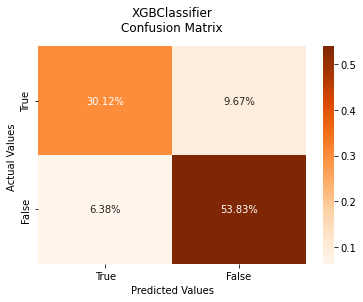

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Oranges', annot=True, fmt='.2%')

plt.title('XGBClassifier\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

### feature importance

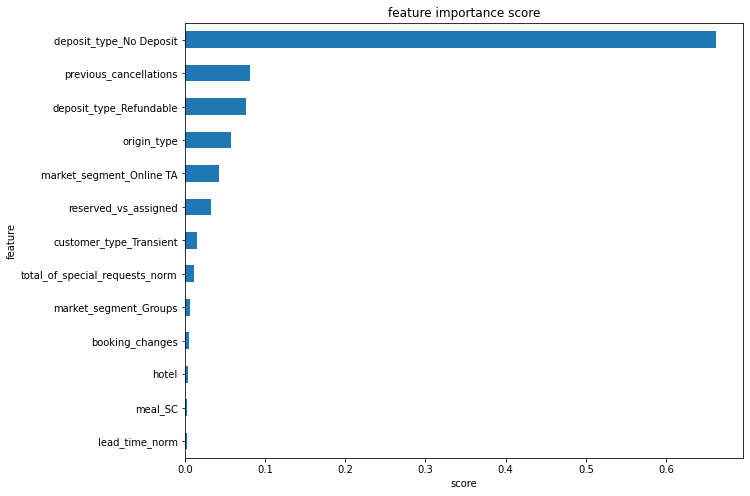

In [ ]:
feat_importances = pd.Series(xg_new.feature_importances_, index=x_new_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

In [ ]:
feat_importances.nlargest(25)

deposit_type_No Deposit           0.662514
previous_cancellations            0.081614
deposit_type_Refundable           0.076831
origin_type                       0.057590
market_segment_Online TA          0.042514
reserved_vs_assigned              0.032695
customer_type_Transient           0.015079
total_of_special_requests_norm    0.011415
market_segment_Groups             0.005887
booking_changes                   0.004838
hotel                             0.003434
meal_SC                           0.002979
lead_time_norm                    0.002609
dtype: float32

### SHAP value

In [ ]:
shap.initjs()

In [ ]:
x_sampled = x_new_train.sample(100, random_state=10)

In [ ]:
explainer = shap.TreeExplainer(xg_new)
shap_values = explainer.shap_values(x_sampled)

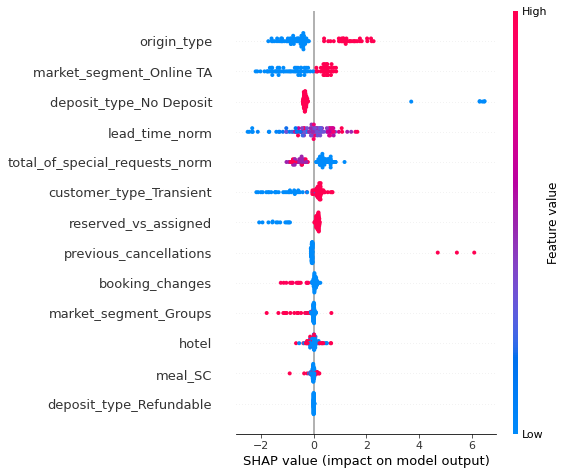

In [ ]:
shap.summary_plot(shap_values, x_sampled)

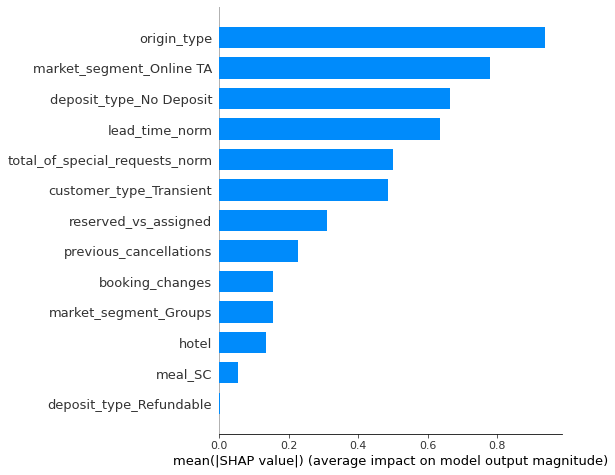

In [ ]:
shap.summary_plot(shap_values, x_sampled, plot_type="bar")